#  Car case study

Geely Auto have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

Goal is to model the price of cars with the available independent variables. 

## Data extraction and Understanding

In [1]:
import pandas as pd
import numpy as np

car_master = pd.read_csv('CarPrice_Assignment.csv')
car_master_copy = car_master

In [2]:
car_master['Model'] = car_master['CarName'].str.split(' ',expand=True).get(0).map(lambda x: x.strip())
car_master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [3]:
car_master.drop('CarName',axis=1,inplace=True)

### Data cleansing and Data handling

In [4]:
car_master = car_master.apply(lambda x: x.astype(str).str.lower())
car_master.Model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Managing typo errors

In [5]:
car_master.Model = car_master.Model.replace({'maxda': 'mazda', 'porcshce': 'porsche','toyouta':'toyota','vokswagen':'volkswagen', 'vw':'volkswagen'})
car_master.Model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Converting String to Categorical variable

************************** Mapping variable to Integer **************************************

In [6]:
#fueltype => gas:0,diesel:1
car_master.fueltype = car_master.fueltype.map({'gas':0,'diesel':1})
#aspiration => std:0,turbo:1
car_master.aspiration = car_master.aspiration.map({'std':0,'turbo':1})
#doornumber => two:0,four:1
car_master.doornumber = car_master.doornumber.map({'two':0,'four':1})
#carbody => 'convertible':0,'hatchback':1,'sedan':2,'wagon':3,'hardtop':4
car_master.carbody = car_master.carbody.map({'convertible':0,'hatchback':1,'sedan':2,'wagon':3,'hardtop':4})
#drivewheel => 'rwd':0,'fwd':1,'4wd':2
car_master.drivewheel = car_master.drivewheel.map({'rwd':0,'fwd':1,'4wd':2})
#enginelocation => 'front':0,'rear':1
car_master.enginelocation = car_master.enginelocation.map({'front':0,'rear':1})
#enginetype => car_master.enginetype
#cylindernumber => car_master.cylindernumber
#fuelsystem => car_master.fuelsystem
#Model => car_master.Model

******** Using dummy variables ********

In [7]:
## Function to convert string column to Integer using dummy variables
#def convertStringToNumberUsingDummy(colName):
#    dummyDF = pd.get_dummies(car_master[colName],drop_first=True)
#    car_master = pd.concat([car_master,dummyDF],axis=1)
#    car_master.drop(colName,axis=1,inplace=True)

In [8]:
#convertStringToNumberUsingDummy('enginetype')
enginetype = pd.get_dummies(car_master['enginetype'],prefix='enginetype',drop_first=True)
#dohc is removed
car_master = pd.concat([car_master,enginetype],axis=1)
car_master.drop('enginetype',axis=1,inplace=True)
car_master.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,citympg,highwaympg,price,Model,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,0,0,0,0,0,0,88.6,168.8,...,21,27,13495.0,alfa-romero,0,0,0,0,0,0
1,2,3,0,0,0,0,0,0,88.6,168.8,...,21,27,16500.0,alfa-romero,0,0,0,0,0,0
2,3,1,0,0,0,1,0,0,94.5,171.2,...,19,26,16500.0,alfa-romero,0,0,0,0,1,0
3,4,2,0,0,1,2,1,0,99.8,176.6,...,24,30,13950.0,audi,0,0,1,0,0,0
4,5,2,0,0,1,2,2,0,99.4,176.6,...,18,22,17450.0,audi,0,0,1,0,0,0


In [9]:
cylindernumber = pd.get_dummies(car_master['cylindernumber'],prefix='cylindernumber',drop_first=True)
#eight is removed
car_master = pd.concat([car_master,cylindernumber],axis=1)
car_master.drop('cylindernumber',axis=1,inplace=True)
car_master.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,0,0,0,0,0,0,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
1,2,3,0,0,0,0,0,0,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
2,3,1,0,0,0,1,0,0,94.5,171.2,...,0,0,1,0,0,0,1,0,0,0
3,4,2,0,0,1,2,1,0,99.8,176.6,...,1,0,0,0,0,1,0,0,0,0
4,5,2,0,0,1,2,2,0,99.4,176.6,...,1,0,0,0,1,0,0,0,0,0


In [10]:
fuelsystem = pd.get_dummies(car_master['fuelsystem'],prefix='fuelsystem',drop_first=True)
#1bbl is removed
car_master = pd.concat([car_master,fuelsystem],axis=1)
car_master.drop('fuelsystem',axis=1,inplace=True)
car_master.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,0,0,0,0,0,0,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,0,0,0,0,0,0,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,0,1,0,0,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,1,2,1,0,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,0,0,1,2,2,0,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [11]:
Model = pd.get_dummies(car_master['Model'],prefix='Model',drop_first=True)
#alfa-romero is removed
car_master = pd.concat([car_master,Model],axis=1)
car_master.drop('Model',axis=1,inplace=True)
#Remove car ID value
car_master.drop('car_ID',axis=1,inplace=True)
car_master.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,Model_nissan,Model_peugeot,Model_plymouth,Model_porsche,Model_renault,Model_saab,Model_subaru,Model_toyota,Model_volkswagen,Model_volvo
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,2,1,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,2,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
car_master.columns.values

array(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Model_audi', 'Model_bmw', 'Model_buick', 'Model_chevrolet',
       'Model_dodge', 'Model_honda', 'Model_isuzu', 'Model_jaguar',
       'Model_mazda', 'Model_mercury', 'Model_mitsubishi', 'Model_nissan',
       'Model_peugeot', 'Model_plymouth', 'Model_pors

Correlation

In [13]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

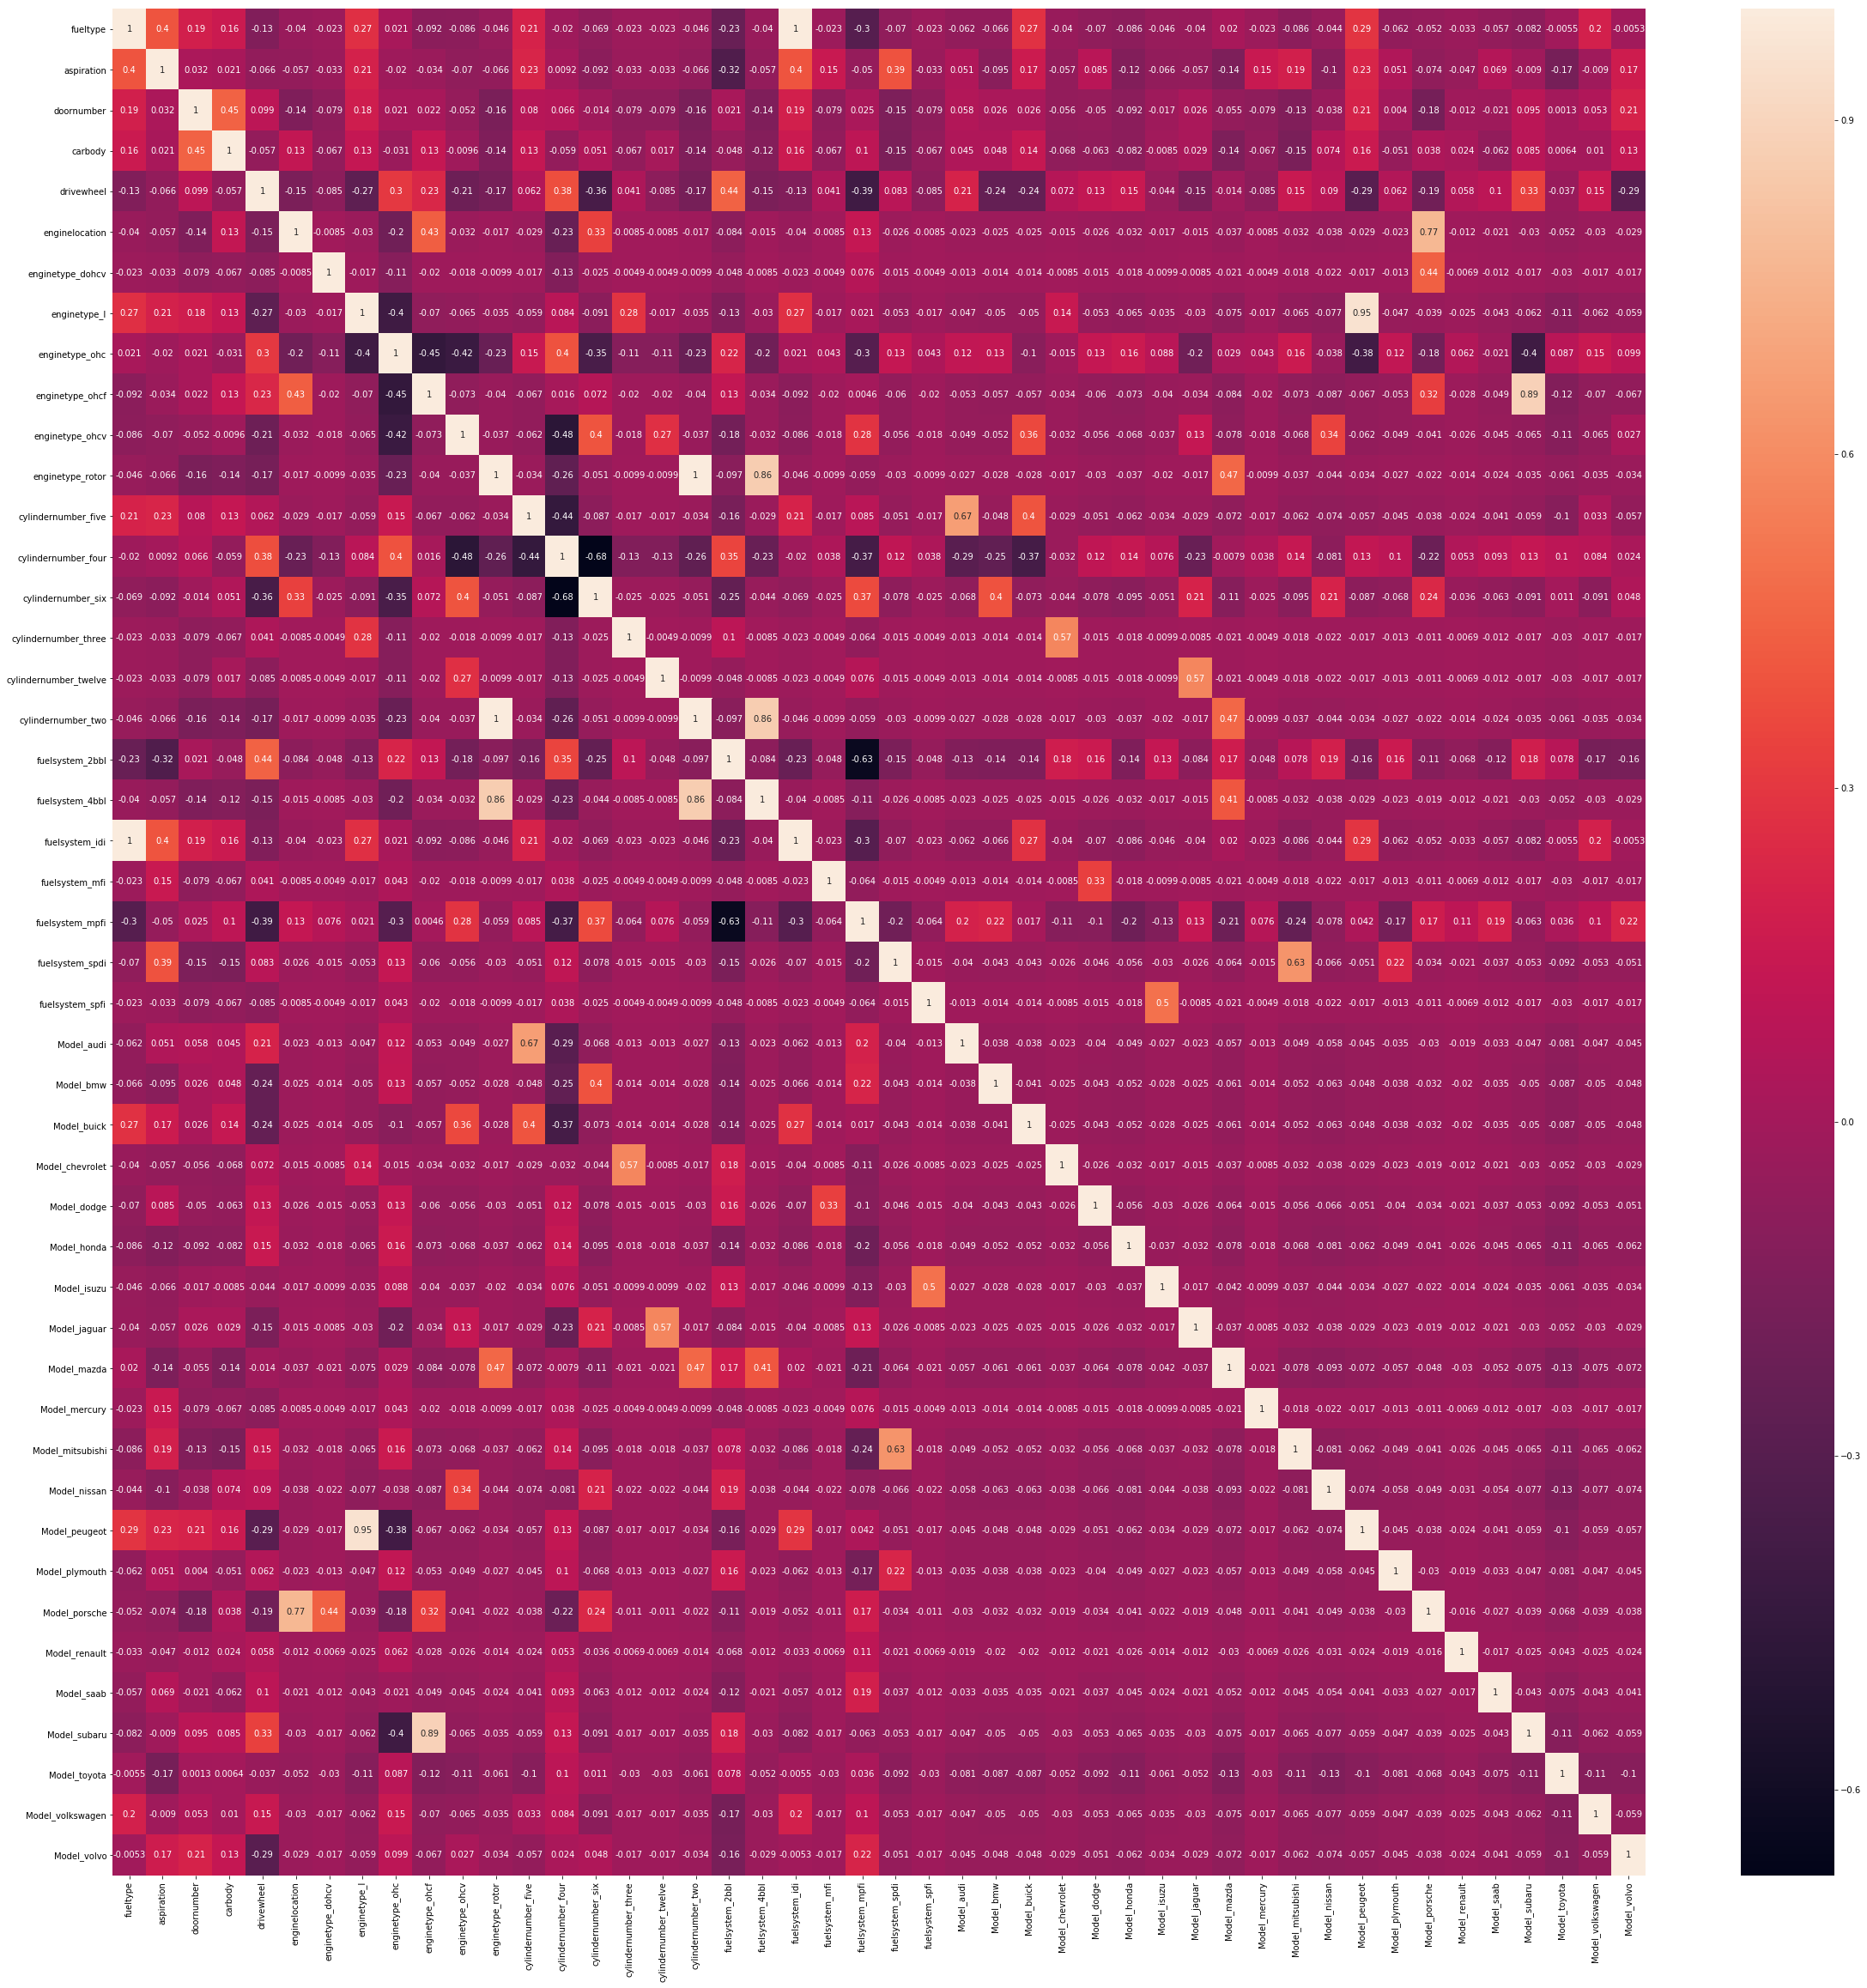

In [14]:
plt.figure(figsize = (40,40) )  # Size of the figure
sns.heatmap(car_master.corr(),annot = True)

User defined functions

In [15]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [16]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-min(x))/ (max(x) - min(x)))

Rescaling feature

In [17]:
#car_master = car_master.apply(normalize)
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
symboling                205 non-null object
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
carbody                  205 non-null int64
drivewheel               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null object
carlength                205 non-null object
carwidth                 205 non-null object
carheight                205 non-null object
curbweight               205 non-null object
enginesize               205 non-null object
boreratio                205 non-null object
stroke                   205 non-null object
compressionratio         205 non-null object
horsepower               205 non-null object
peakrpm                  205 non-null object
citympg                  205 non-null object
highwaympg               205 non-null object
p

In [18]:
#Converting datatype to apply normalize function
car_master = car_master.convert_objects(convert_numeric=True)

C:\Users\Vignesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [19]:
car_master = car_master.apply(normalize)
car_master.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,Model_nissan,Model_peugeot,Model_plymouth,Model_porsche,Model_renault,Model_saab,Model_subaru,Model_toyota,Model_volkswagen,Model_volvo
0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.058309,0.413433,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.058309,0.413433,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.0,0.0,0.0,0.25,0.0,0.0,0.230321,0.449254,0.433333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.0,0.0,1.0,0.50,0.5,0.0,0.384840,0.529851,0.491667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.0,0.0,1.0,0.50,1.0,0.0,0.373178,0.529851,0.508333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## RFE

In [20]:
X = car_master.loc[:, car_master.columns != 'price']
y = car_master['price']

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
X_train = X_train[col]

C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

C:\Users\Vignesh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        18:39:32   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

In [23]:
car_master = car_master[['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'Model_bmw', 'Model_peugeot', 'Model_porsche','price']]

In [24]:
vif_cal(input_data=car_master, dependent_col="price")

C:\Users\Vignesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Var,Vif
6,enginetype_rotor,inf
11,cylindernumber_two,inf
2,curbweight,50.120000
3,enginesize,46.810000
1,carwidth,41.940000
4,boreratio,33.880000
8,cylindernumber_four,20.860000
5,stroke,20.570000
14,Model_porsche,2.990000
0,enginelocation,2.880000


### Correlation between reduced variables

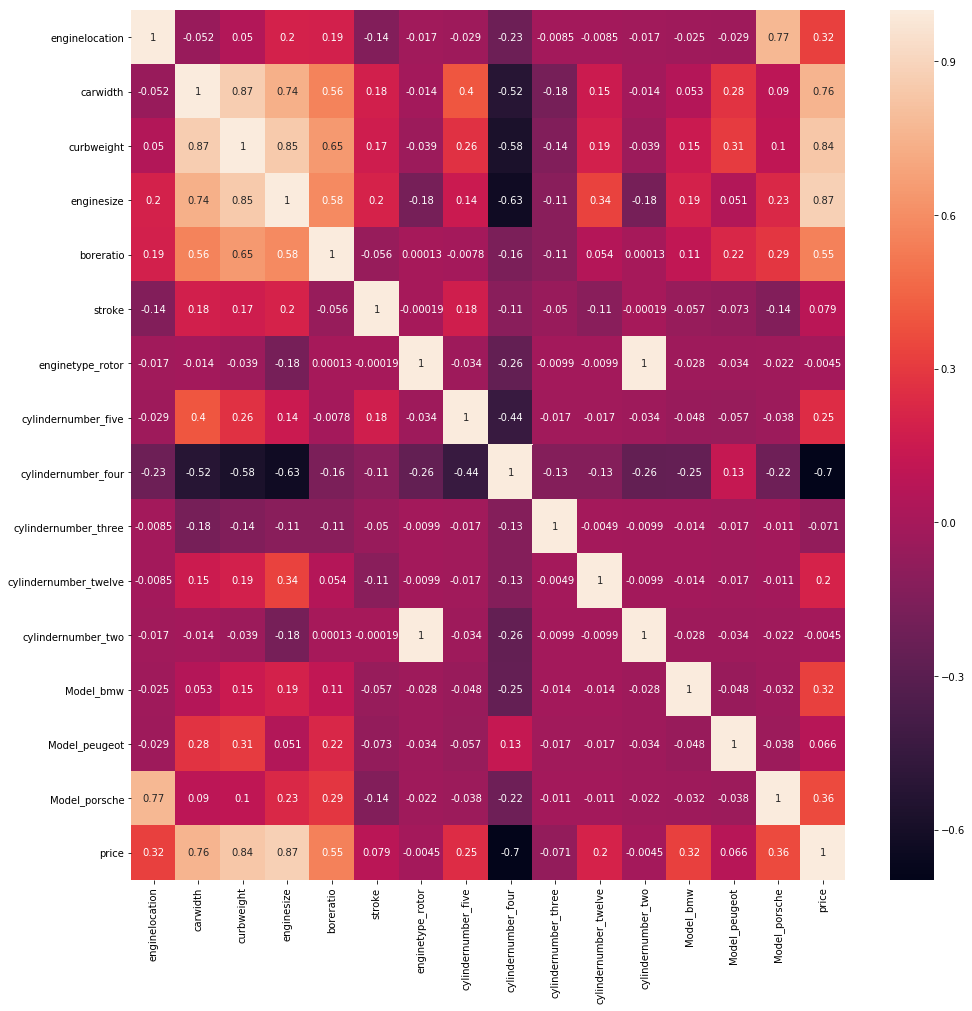

In [25]:
plt.figure(figsize = (16,16) )  # Size of the figure
sns.heatmap(car_master.corr(),annot = True)

### Variable reduction using VIF

cylindernumber_two and enginetype_rotor are highly correlated and hence removing cylindernumber_two

In [26]:
X_train = X_train.drop('cylindernumber_two', 1)
lm_1 = sm.OLS(y_train,X_train).fit() 
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        18:39:34   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

In [27]:
vif_cal(input_data=car_master.drop('cylindernumber_two',axis=1), dependent_col="price")

,Var,Vif
2,curbweight,50.12
3,enginesize,46.81
1,carwidth,41.94
4,boreratio,33.88
8,cylindernumber_four,20.86
5,stroke,20.57
13,Model_porsche,2.99
0,enginelocation,2.88
7,cylindernumber_five,2.46
6,enginetype_rotor,2.37


Curb weight is 85% correlated with engine size hence dropping the same

In [28]:
X_train = X_train.drop('curbweight', axis=1)
lm_2 = sm.OLS(y_train,X_train).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.25e-67
Time:                        18:39:35   Log-Likelihood:                 219.76
No. Observations:                 143   AIC:                            -411.5
Df Residuals:                     129   BIC:                            -370.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

In [29]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight'],axis=1), dependent_col="price")

,Var,Vif
2,enginesize,39.39
1,carwidth,32.95
3,boreratio,31.21
4,stroke,20.55
7,cylindernumber_four,20.49
0,enginelocation,2.88
12,Model_porsche,2.88
6,cylindernumber_five,2.45
5,enginetype_rotor,2.36
9,cylindernumber_twelve,1.58


In [30]:
X_train = X_train.drop('enginesize', axis=1)
lm_3 = sm.OLS(y_train,X_train).fit() 
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     70.97
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.10e-51
Time:                        18:39:35   Log-Likelihood:                 176.79
No. Observations:                 143   AIC:                            -327.6
Df Residuals:                     130   BIC:                            -289.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [31]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,22.49
2,boreratio,18.67
3,stroke,13.39
6,cylindernumber_four,6.51
11,Model_porsche,2.77
0,enginelocation,2.70
5,cylindernumber_five,1.59
10,Model_peugeot,1.29
9,Model_bmw,1.18
4,enginetype_rotor,1.14


In [32]:
#Dropping cylindernumber_three due to higer p-value
X_train = X_train.drop('cylindernumber_three', axis=1)
lm_4 = sm.OLS(y_train,X_train).fit() 
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     77.97
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.82e-52
Time:                        18:39:35   Log-Likelihood:                 176.76
No. Observations:                 143   AIC:                            -329.5
Df Residuals:                     131   BIC:                            -294.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [33]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,21.50
2,boreratio,18.24
3,stroke,12.81
6,cylindernumber_four,6.30
10,Model_porsche,2.77
0,enginelocation,2.69
5,cylindernumber_five,1.59
9,Model_peugeot,1.28
8,Model_bmw,1.18
4,enginetype_rotor,1.13


In [34]:
#dropping porsche due to its pvalue
X_train = X_train.drop('Model_porsche', axis=1)
lm_5 = sm.OLS(y_train,X_train).fit() 
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     86.08
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.66e-53
Time:                        18:39:36   Log-Likelihood:                 176.50
No. Observations:                 143   AIC:                            -331.0
Df Residuals:                     132   BIC:                            -298.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [35]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,21.20
2,boreratio,18.08
3,stroke,12.53
6,cylindernumber_four,6.27
5,cylindernumber_five,1.57
9,Model_peugeot,1.27
0,enginelocation,1.23
8,Model_bmw,1.17
4,enginetype_rotor,1.13
7,cylindernumber_twelve,1.08


In [36]:
#Dropping stroke due to higer vif and p value
X_train = X_train.drop('stroke', axis=1)
lm_6 = sm.OLS(y_train,X_train).fit() 
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     94.88
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.84e-53
Time:                        18:39:36   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -331.1
Df Residuals:                     133   BIC:                            -301.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [37]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke'],axis=1), dependent_col="price")

,Var,Vif
2,boreratio,17.90
1,carwidth,14.65
5,cylindernumber_four,4.00
4,cylindernumber_five,1.55
0,enginelocation,1.22
7,Model_bmw,1.16
8,Model_peugeot,1.15
3,enginetype_rotor,1.08
6,cylindernumber_twelve,1.06


In [38]:
#Dropped due to high vif
X_train = X_train.drop('boreratio', axis=1)
lm_7 = sm.OLS(y_train,X_train).fit() 
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           3.44e-53
Time:                        18:39:36   Log-Likelihood:                 172.32
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     134   BIC:                            -300.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [39]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke','boreratio'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,3.94
4,cylindernumber_four,2.96
3,cylindernumber_five,1.49
7,Model_peugeot,1.14
6,Model_bmw,1.11
2,enginetype_rotor,1.06
5,cylindernumber_twelve,1.06
0,enginelocation,1.04


In [40]:
#Dropped due to high p value
X_train = X_train.drop('Model_peugeot', axis=1)
lm_8 = sm.OLS(y_train,X_train).fit() 
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.45e-53
Time:                        18:39:36   Log-Likelihood:                 170.66
No. Observations:                 143   AIC:                            -325.3
Df Residuals:                     135   BIC:                            -301.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [41]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke','boreratio','Model_peugeot'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,3.71
4,cylindernumber_four,2.96
3,cylindernumber_five,1.47
6,Model_bmw,1.10
2,enginetype_rotor,1.06
5,cylindernumber_twelve,1.05
0,enginelocation,1.03


In [42]:
#Dropped due to high vif
X_train = X_train.drop('enginetype_rotor', axis=1)
lm_9 = sm.OLS(y_train,X_train).fit() 
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           9.07e-54
Time:                        18:39:36   Log-Likelihood:                 168.52
No. Observations:                 143   AIC:                            -323.0
Df Residuals:                     136   BIC:                            -302.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [43]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke','boreratio','Model_peugeot','enginetype_rotor'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,3.50
3,cylindernumber_four,2.85
2,cylindernumber_five,1.44
5,Model_bmw,1.10
4,cylindernumber_twelve,1.05
0,enginelocation,1.03


In [44]:
X_train = X_train.drop('cylindernumber_five', axis=1)
lm_10 = sm.OLS(y_train,X_train).fit() 
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           6.33e-54
Time:                        18:39:37   Log-Likelihood:                 166.19
No. Observations:                 143   AIC:                            -320.4
Df Residuals:                     137   BIC:                            -302.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [45]:
vif_cal(input_data=car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke','boreratio','Model_peugeot','enginetype_rotor','cylindernumber_five'],axis=1), dependent_col="price")

,Var,Vif
1,carwidth,2.43
2,cylindernumber_four,2.28
4,Model_bmw,1.07
3,cylindernumber_twelve,1.03
0,enginelocation,1.02


## Testing the final Model

##### With Model lm_10

In [46]:
# Considering columns that are result of rfe
X_test_m10 = X_test[['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'Model_bmw', 'Model_peugeot', 'Model_porsche']]

In [47]:
# Adding  constant variable to test dataframe
X_test_m10 = sm.add_constant(X_test_m10)

In [48]:
# Removing insignificant variables found during model evaluation from the test set
X_test_m10.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke','boreratio','Model_peugeot','enginetype_rotor','cylindernumber_five'],axis=1,inplace=True)

In [49]:
# Prediction
y_pred_m10 = lm_10.predict(X_test_m10)

In [50]:
y_pred_m10.count

<bound method Series.count of 160    0.074040
186    0.135869
59     0.192077
165    0.051557
140    0.040316
64     0.192077
198    0.231422
75     0.276388
172    0.141490
104    0.372072
200    0.326975
136    0.192077
111    0.298871
41     0.119007
73     0.585662
31     0.045937
156    0.074040
133    0.192077
65     0.169594
83     0.180835
195    0.231422
197    0.231422
126    0.717690
118    0.040316
167    0.141490
101    0.293381
124    0.180835
69     0.506971
11     0.349901
46     0.119007
         ...   
110    0.298871
201    0.321354
115    0.298871
174    0.192077
134    0.192077
169    0.141490
92     0.040316
173    0.192077
74     0.602524
3      0.175214
157    0.074040
81     0.130248
32     0.051557
99     0.119007
26     0.040316
88     0.130248
184    0.135869
187    0.135869
52     0.062799
168    0.141490
164    0.051557
188    0.135869
7      0.568799
158    0.074040
123    0.085282
28     0.085282
29     0.180835
182    0.135869
40    -0.032754
128    0.7

In [51]:
y_test.count

<bound method Series.count of 160    0.065041
186    0.083834
59     0.092523
165    0.103768
140    0.061690
64     0.152103
198    0.330222
75     0.282632
172    0.311578
104    0.299911
200    0.291123
136    0.323519
111    0.259719
41     0.194305
73     0.889777
31     0.043121
156    0.045181
133    0.175066
65     0.326746
83     0.242068
195    0.205973
197    0.282930
126    0.680453
118    0.011271
167    0.082692
101    0.208058
124    0.189812
69     0.572414
11     0.293109
46     0.147212
         ...   
110    0.217020
201    0.345738
115    0.285785
174    0.138523
134    0.246313
169    0.120922
92     0.042972
173    0.095080
74     1.000000
3      0.219254
157    0.051636
81     0.083933
32     0.006976
99     0.095105
26     0.061839
88     0.103297
184    0.071421
187    0.108659
52     0.041631
168    0.112234
164    0.077454
188    0.121071
7      0.342634
158    0.069013
123    0.094409
28     0.094409
29     0.194777
182    0.065960
40     0.128519
128    0.7

## Model Evaluation

Text(0,0.5,'Car Price')

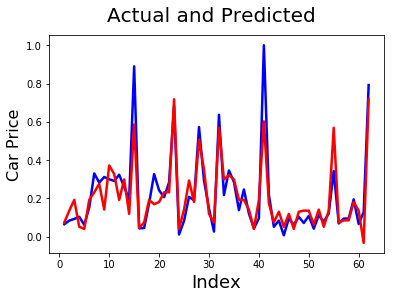

In [52]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m10, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'Prediction')

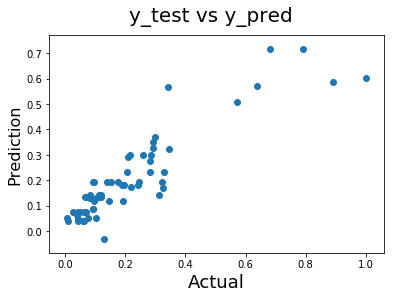

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Prediction', fontsize=16)                          # Y-label

The plot is fairly linear between actual and prediction and hence can be considered a valid.

Text(0,0.5,'Actual-Prediction')

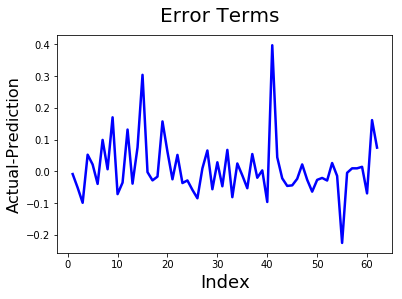

In [54]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m10, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual-Prediction', fontsize=16)                # Y-label

Text(0,0.5,'Index')

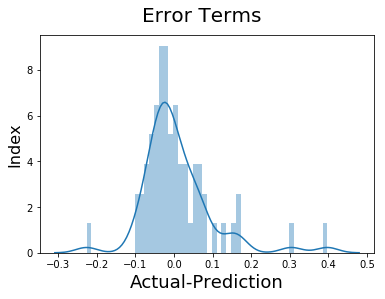

In [55]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m10),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('Actual-Prediction', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

The error is normally distributed and hence it satisfies the linear regression assumption.

In [56]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m10)))

RMSE : 0.0920366078721376


Mean squared error is less and hence concludes the model is suitable for the given dataset.

## Concluding the model by validating the correlation between variables

Text(0,0.5,'price')

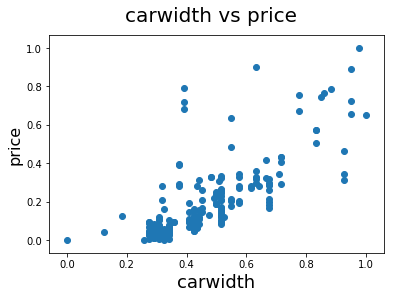

In [57]:
fig = plt.figure()
plt.scatter(car_master.carwidth,car_master.price)
fig.suptitle('carwidth vs price', fontsize=20)              # Plot heading 
plt.xlabel('carwidth', fontsize=18)                          # X-label
plt.ylabel('price', fontsize=16)                          # Y-label

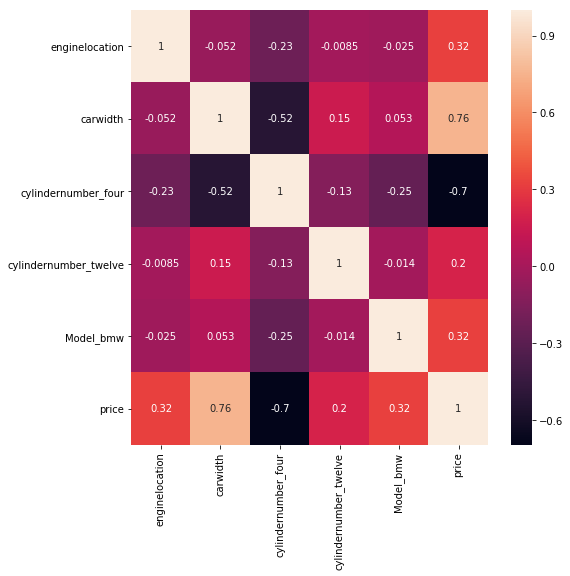

In [58]:
plt.figure(figsize = (8,8) )  # Size of the figure
sns.heatmap(car_master.drop(['cylindernumber_two','curbweight','enginesize','cylindernumber_three','Model_porsche','stroke','boreratio','Model_peugeot','enginetype_rotor','cylindernumber_five'],axis=1).corr(),annot = True)

## Conclusion

Model lm_10 is suitable linear regression model for the given dataset. 
    Enginelocation,carwidth,BMW model and cars with 12 and 4 cylinders are deterministic variable in deciding the price of cars.